In [1]:
import cv2
import cv2_plus

나중에 cvtColor를 통해 이미지 변형하여,<br> 
원본 이미지가 변형되기 때문에 복사본 만듬

In [2]:
imgfile = 'images/contour.jpg'
img = cv2.imread(imgfile) # 복사본

cv2_plus는 jupyter notebook에서 이미지 display 혹은 추가적인 기능을 위해 만든 모듈

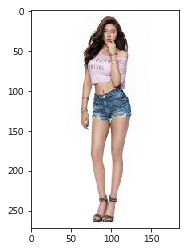

In [3]:
cv2_plus.img_show(img)

cv2.cvtColor는 Color-Space변환에 사용. <br>
일반적으로는 BGR <-> Gray, BGR <-> HSV가 많이 사용된다고함<br>
- cv2.COLOR_BGR2GRAY : BGR -> Grayscale
- cv2.COLOR_BGR2HSV : BGR -> HSV

In [4]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.Canny(image, threshold1, threshold2)
- image : 8비트 입력 이미지
- threshold1 : 임계값에서 min 값
- threshold2 : 임계값에서 max 값

### Canny Edge Detection은 가장 유명한 Edge Detection(윤곽선 검출) 방법으로 총 4가지의 단계를 거쳐 수행된다.
1. 이미지의 **Noise를 제거** 합니다.
2. 이미지에서 **Gradient가 높은 영역**을 찾는다.(Gradient가 높은 부분은 변화가 크게 일어나는 부분. 즉, 경계)
3. Non-maximum suppression : Edge가 아닌 픽셀의 값을 0(제거)으로 한다. **Local maxima를 찾는 과정**.
4. Hyteresis Thresholding : 3 단계에서의 Edge를 한 번더 Edge인지 아닌지 판별
5. Edge 연결

설명은 아래 링크들 참고<br>
refer to :<br>
https://opencv-python.readthedocs.io/en/latest/doc/13.imageGradient/imageGradient.html?highlight=canny<br>
https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220507996391&referrerCode=0&searchKeyword=canny<br>
http://carstart.tistory.com/188<br>
https://www.youtube.com/watch?v=Y_YPlGP4T44&t=101s<br>

In [5]:
edge = cv2.Canny(imgray, 100, 200)

contour : 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선을 연결한 선을 말한다.

- 높은 정확도를 위해 Binary image를 사용한다(threshold나 canny edge로 전처리).
- cv2.findContours()는 원본 이미지를 직접 수정하기 때문에 Copy하여 사용
- OpenCV에서 contours를 찾는 것은 검은색 배경에서 하얀색 대상을 찾는 것과 같으므로, **대상은 흰색 그리고 배경은 검은색으로 처리**

cv2.findContours(imgae, mode, method)<br>
- image : binary image
- mode : contour를 찾는 방법 혹은 contour 계층을 나타내는 방법
- method : contour 찾기에 사용되는 근사치 방법
<br>
<br>
Returns : image, contours, hierachy

findContours의 입력 이미지는 binary image형태이어야 한다.

In [6]:
edge, contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hierarchy는 contour들 간의 계층 구조를 나타낸다.

In [7]:
print(hierarchy.shape)
# print(hierarchy)

(1, 96, 4)


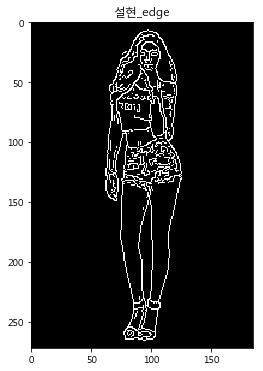

In [8]:
# cv2.imshow('edge', edge)
cv2_plus.imshow(edge, title = '설현_edge', fig_size = (12,6), img_type = 0)

cv2.drawContours를 통해 원본 사진 위에 draw

cv2.drawContours(image, contours, contourIdx, color, thickness)
- image : 원본 사진
- contours : img에 나타낼 contour 정보. contour[i][j]와 같이 접근가능(list형태)
- contourldx : contours list type에서 몇 번째 contours line을 그릴 것인가(-1은 전체)
- color : contours 표시 색깔
- thickness : contours line 두께, 음수라면 contours line의 내부를 채움

### contour index에 따른 이미지 출력, contour[i][j]와 같이 접근

In [9]:
print('찾은 contour 총 개수 : ',len(contours))

찾은 contour 총 개수 :  96


contourIdx : -1, 전부 그렸을 경우

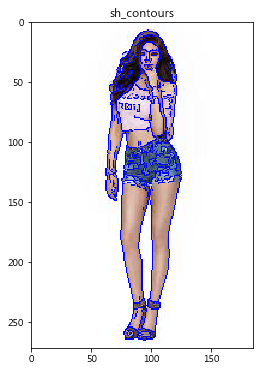

In [10]:
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
cv2_plus.imshow(img,title = 'sh_contours', fig_size = (12,6))

이미지에 contour를 한 번 그렸으므로 다시 불러와(cv2.imread) 그려준다

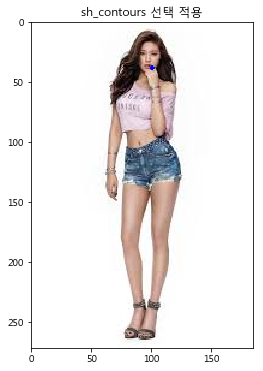

In [11]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours, 90, (255, 0, 0), 2)
cv2_plus.imshow(img,title = 'sh_contours 선택 적용', fig_size = (12,6))

다른 이미지에 적용시켜보기

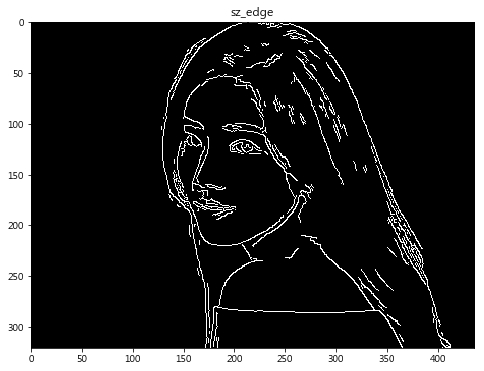

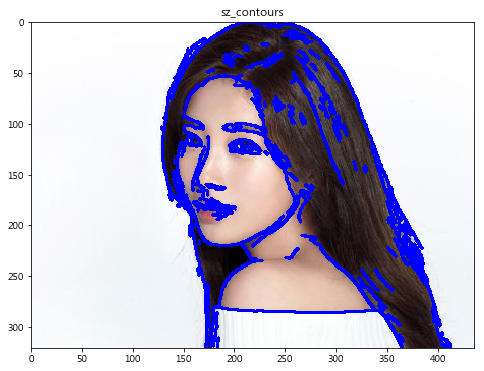

In [12]:
imgfile2 = 'images/contour2.jpg'
img2 = cv2.imread(imgfile2)
imgray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
edge2 = cv2.Canny(imgray2, 100, 200)

edge2, contours2, _ = cv2.findContours(edge2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2_plus.imshow(edge2, title = 'sz_edge', fig_size = (12,6), img_type = 0)
cv2.drawContours(img2, contours2, -1, (255, 0, 0), 2)
cv2_plus.imshow(img2,title = 'sz_contours', fig_size = (12,6))


얼굴쪽에 가까운 부분만 찾아서 표시해보기

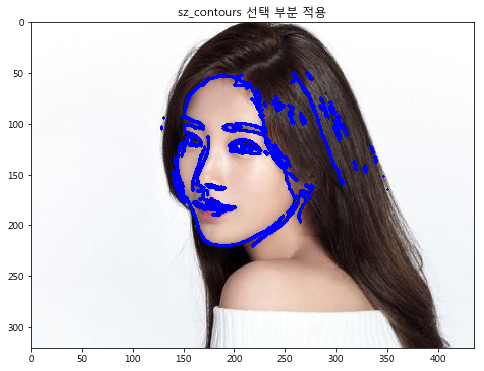

In [13]:
img2 = cv2.imread(imgfile2)
for i in range(70):
    cv2.drawContours(img2, contours2, i+60, (255, 0, 0), 2)
cv2_plus.imshow(img2,title = 'sz_contours 선택 부분 적용', fig_size = (12,6))